## Table Of Content

1. [Libraries](#libraries)
2. [Data](#data)
3. [Data Dictionary](#dictionary)
4. [Data cleaning](#cleaning)
5. [Exploratory Data Analysis](#eda)

<a name="libraries"><a/>
## Libraries

In [1]:
import pandas as pd
import numpy as np

from plotnine import *
import matplotlib.pyplot as plt
import squarify as sq

In [2]:
# custom Functions ----------------------------------
import function as fn

pd.options.mode.chained_assignment = None 

<a name="data"><a/>
## Data

In [3]:
q1 = pd.read_excel("IGR_2021.xlsx", sheet_name = "Q1_sheet", engine = "openpyxl")
q2 = pd.read_excel("IGR_2021.xlsx", sheet_name = "Q2_sheet", engine = "openpyxl")
half_year = pd.read_excel("IGR_2021.xlsx", sheet_name = "Half_year", engine = "openpyxl")

In [4]:
q1.head(3)

,State,PAYE,Direct Assessment,Road Tax,Other Taxes,Total Tax,MDAs,Grand Total
0,Abia,2.963449e+09,81640899.59,1.302985e+08,3.950792e+08,3.570468e+09,6.813066e+08,4.251774e+09
1,Adamawa,2.038466e+09,32832020.52,3.430308e+07,1.918657e+08,2.297466e+09,8.131837e+08,3.110650e+09
2,Akwa Ibom,7.767350e+09,29791881.59,3.985261e+08,8.270088e+08,9.022677e+09,1.208734e+09,1.023141e+10


In [5]:
q2.head(3)

,State,PAYE,Direct Assessment,Road Tax,Other Taxes,Total Tax,MDAs,Grand Total
0,Abia,2.695934e+09,58937015.00,102928885.0,1.863752e+08,3.044176e+09,2.541620e+08,3.298337e+09
1,Adamawa,1.236716e+09,18107095.00,21947325.0,6.136229e+08,1.890393e+09,1.085533e+09,2.975926e+09
2,Akwa Ibom,5.611261e+09,36917346.18,84644650.0,7.796896e+08,6.512513e+09,1.350626e+09,7.863139e+09


In [6]:
half_year.head(2)

,State,PAYE,Direct Assessment,Road Tax,Other Taxes,Total Tax,MDAs,Grand Total
0,Abia,5.659384e+09,1.405779e+08,2.332274e+08,5.814544e+08,6.614643e+09,9.354686e+08,7.550112e+09
1,Adamawa,3.275181e+09,5.093912e+07,5.625040e+07,8.054885e+08,4.187859e+09,1.898717e+09,6.086576e+09


<a name="dictionary"><a/>
## Data Dictionary  
The data was generated by the National Bureau of Statistics in Nigeria for revenues generated internally by the 36 states of the federation including the federal capital territory Abuja for the first half for 2021, the data included are the first quarter, second quarter and a combination of them (half year). 
    
      
Variables included in the data are ::  
  
**PAYE**      :: (Pay as you earn) This is collected from employees salaries & wages through deduction at source by an employer as a form of Personal Income Tax. 
**Direct Assessment** :: This is collected from self employed persons after been assessed and charged to pay tax based on their personal income generated.   
**Road Tax**  :: Tax collection with involve transportation using roads.  
**Other Tax** ::  
**Total tax** :: Addition of PAYE, Direct Assessment, Road Tax and Other tax.  
**MDAs**      :: Revenue from Managements Departments and Agencies.  
**Grand Total** :: Addition of Total Tax and MDAs revenue.  
  
All amounts are in Naira denomination.

The Months for Each period include   
The First Quarter :: January, February and March.  
The Second Quarter :: April, May and June.  
Half Year  :: All month from January to June.

<a name="cleaning"><a/>
## Data cleaning 

In [7]:
q1 = fn.clean_data(q1)
q2 = fn.clean_data(q2)
half_year = fn.clean_data(half_year)

<a name="eda"><a/>
## Exploratory Data Analysis

1. [Total amount generated from the different revenues for each states.](#tagftdrfes)
2. [Internally Generated Revenue by Geo-political Zone](#igrbgz)
3. [Sources Of Internally Generated Revenue by State](#soigrbs)
4. [Total Internally Generate Revenue For States within a Geo-Political Zone](#tigtfswagz)
5. [Percentage Increase Or Decrease In Revenue](#piodir)
6. [Summary of All Revenue Generated From All state](#soargfas)

In [8]:
h1_2020 = 612_868_434_827.04
q1_2020 = 353_136_738_183.55
q2_2020 = 259_731_696_643.50

print("Total Internally Generated Revenue For:")
print("="*50)
print("1st half of 2020    ::", fn.comma_format(h1_2020))
print("1st half of 2021    ::", fn.comma_format(half_year["Grand Total"].sum()))
print("-"*50)

print("1st Quarter of 2020 ::", fn.comma_format(q1_2020))
print("1st Quarter of 2021 ::", fn.comma_format(q1["Grand Total"].sum()))
print("-"*50)

print("2nd Quarter of 2020 ::", fn.comma_format(q2_2020))
print("2nd Quarter of 2021 ::", fn.comma_format(q2["Grand Total"].sum()))

Total Internally Generated Revenue For:
1st half of 2020    :: 612,868,434,827.04
1st half of 2021    :: 849,123,384,003.553
--------------------------------------------------
1st Quarter of 2020 :: 353,136,738,183.55
1st Quarter of 2021 :: 398,259,343,434.9829
--------------------------------------------------
2nd Quarter of 2020 :: 259,731,696,643.5
2nd Quarter of 2021 :: 450,864,040,568.57007


According to the data the total amount generate by all 36 states including the federal capital for the half year of 2021 was N849.55 billion while N398.98 billion
and N450.57 billion was generate in the first and second quarter of 2021 respectively.

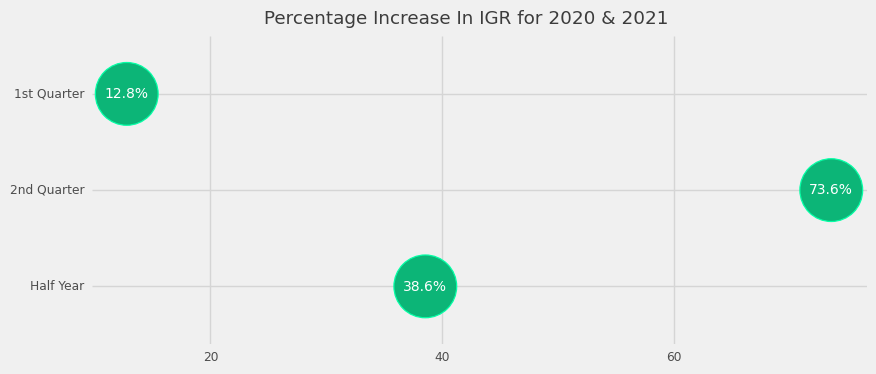

<ggplot: (16634341)>

In [9]:
# Comparison with 2020 IGR

half_change = pd.DataFrame({
    "period": ["1st Quarter", "2nd Quarter", "Half Year"],
    "IGR_20": [q1_2020, q2_2020, h1_2020],
    "IGR_21": [q1["Grand Total"].sum(), q2["Grand Total"].sum(), half_year["Grand Total"].sum()]
})

half_change = fn.percent_change(half_change, "IGR_20", "IGR_21")
half_change["period"] = half_change["period"].astype("category")
half_change["period"] = half_change["period"].cat.reorder_categories(["Half Year", "2nd Quarter", "1st Quarter"], ordered = True)
half_change["change_label"] = round(half_change["percent_change"], 1).astype("str")+"%"
half_change


(
    ggplot(half_change, aes(x = "period", y = "percent_change")) +
    geom_point(size = 25, color = "#05ffa6", fill = "#0cb577") +
    geom_text(aes(label = "change_label"), color = "white", size = 10) +
    coord_flip() + 
    theme_538() +
    labs(x = "", y = "", title = "Percentage Increase In IGR for 2020 & 2021") +
    theme(figure_size = (10, 4))
)

The figure above shows an increase in IGR for the first, second and first half of 2021,  
A 12.8% increase in IGR for the 1st Quarter of 2021 from 2020 and a 73.6% increase in IGR for the 2nd Quarter of 2021 from 2020, also there was a 38.6% increase in IGR for the first half of 2021 from that of 2020.  
Meanwhile this increase in IGR across the selected period could be attributed to covid-19 lockdown that affected the economic activities in 2020.

<a name="tagftdrfes"><a/>
## Total amount generated from the different revenues for each states.

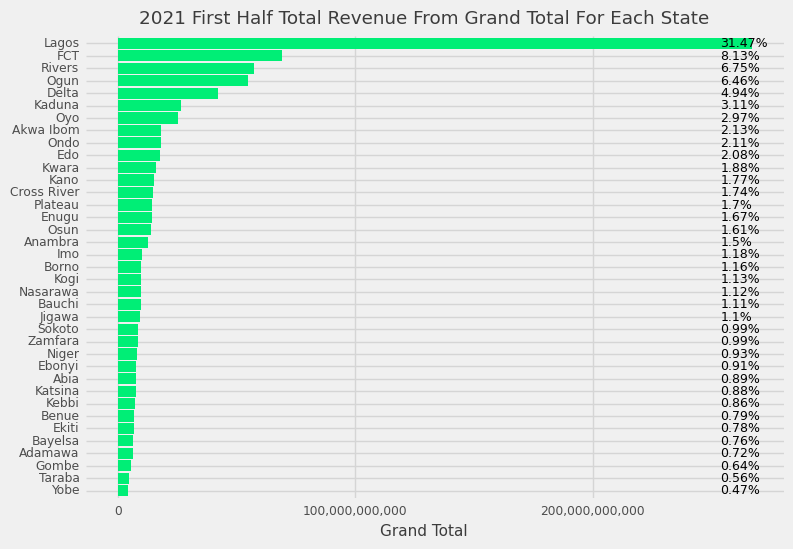

<ggplot: (17096947)>

In [10]:
fn.get_revenue(half_year, "State", "Grand Total", "half year")

Lagos state, Abuja (FCT) and Revers state led the list of states with the highest internally generated revenue in the first half and also for the first quarter of 2021, while Lagos abuja and Ogun state led for the 2nd Quarter of 2021.

#### Other periods and revenue

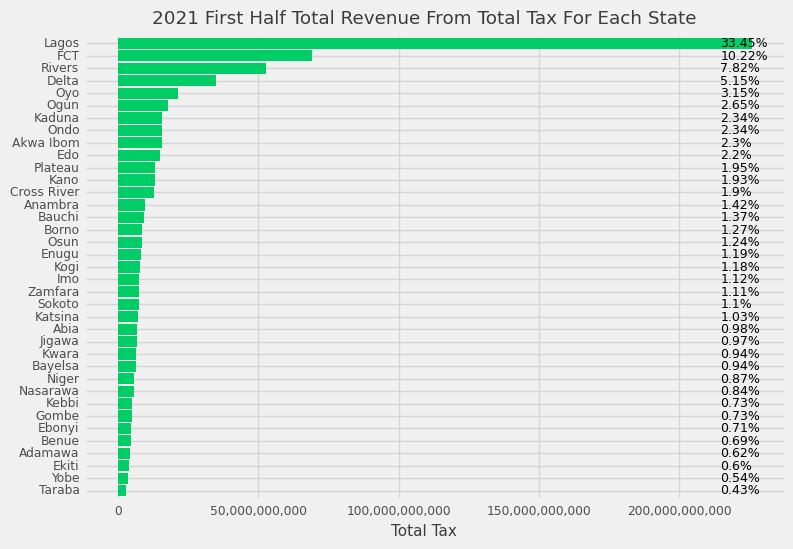

<ggplot: (16291361)>

In [11]:
fn.get_revenue(half_year, "State", "Total Tax", "half year")

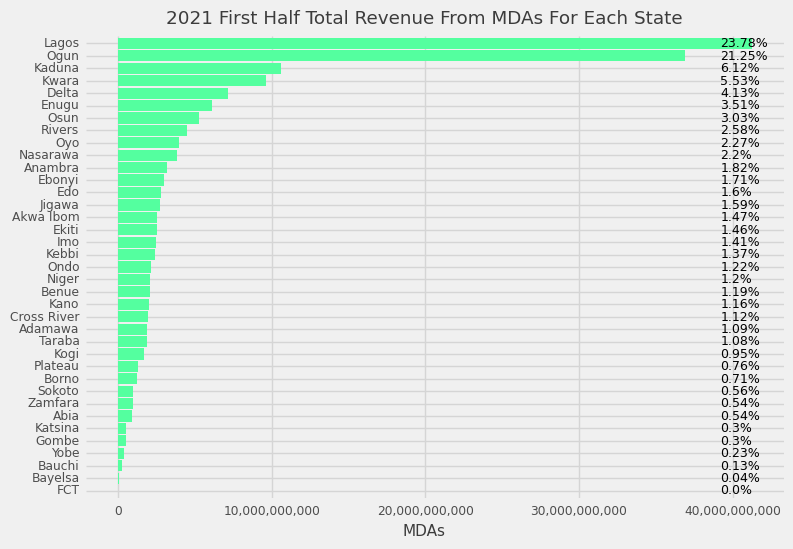

<ggplot: (17311181)>

In [12]:
fn.get_revenue(half_year, "State", "MDAs", "half year")

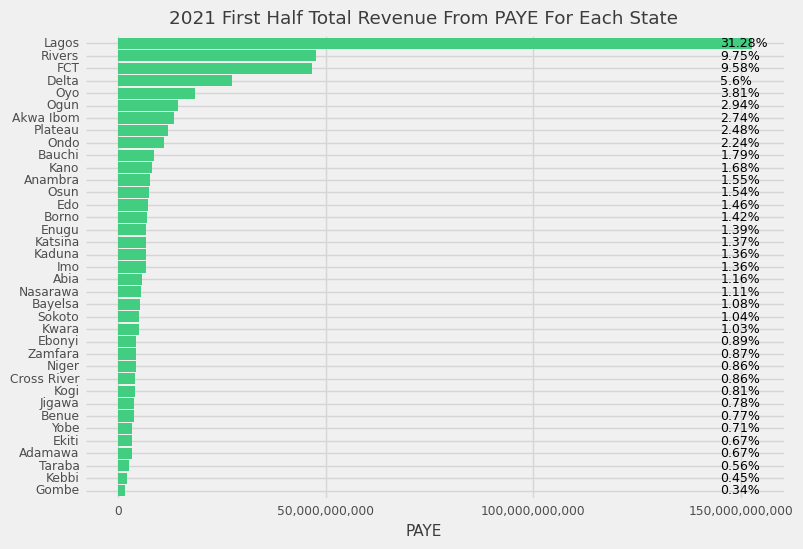

<ggplot: (17333131)>

In [13]:
fn.get_revenue(half_year, "State", "PAYE", "half year")

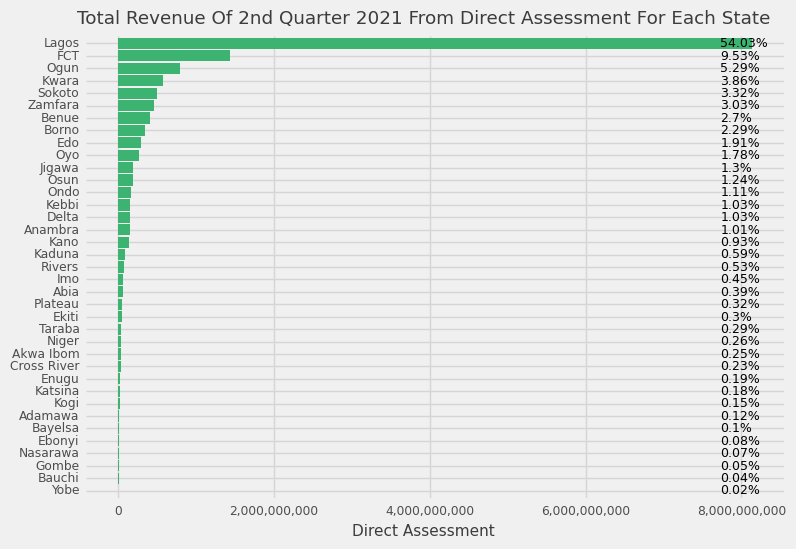

<ggplot: (17324913)>

In [14]:
fn.get_revenue(q2, "State", "Direct Assessment", "q2")

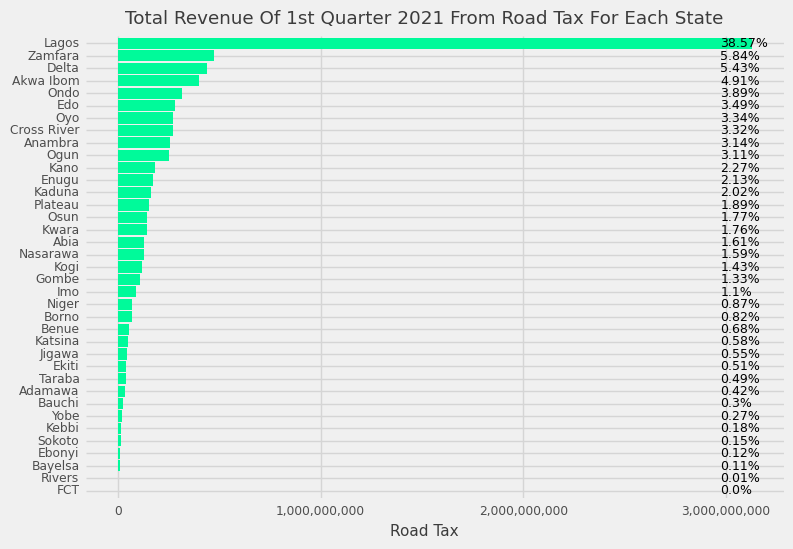

<ggplot: (17105249)>

In [15]:
fn.get_revenue(q1, "State", "Road Tax", "q1")

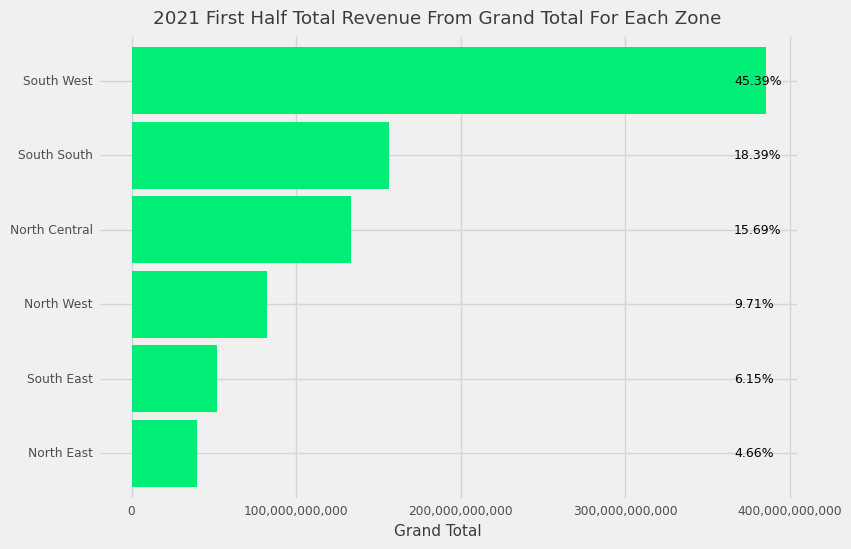

<ggplot: (17098215)>

In [16]:
fn.get_revenue(half_year, "Zone", "Grand Total", "half year")

The South West region generated the highest amount of IGR with N385.27 billion (45.4%) of the total amount generated, 
this is followed by South South region N156.04 billion (18.4%), North Central region N133.28 billion (15.69%) while the North East region had the lowest IGR of N39 billion (4.7%).

#### Some of other Revenues and Period

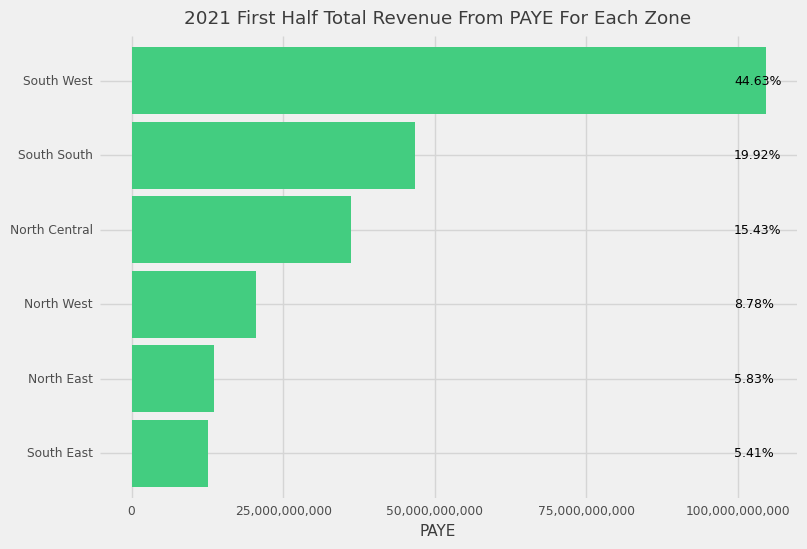

<ggplot: (16635987)>

In [17]:
fn.get_revenue(q2, "Zone", "PAYE", "half year")

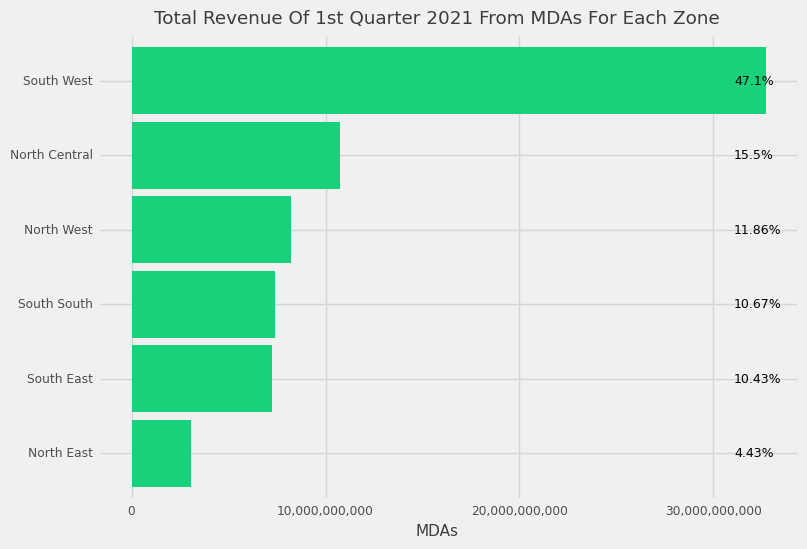

<ggplot: (17134609)>

In [18]:
fn.get_revenue(q1, "Zone", "MDAs", "q1", colr = "#18d17b")

<a name="igrbgz"><a/>
## Internally Generated Revenue by Geo-political Zone

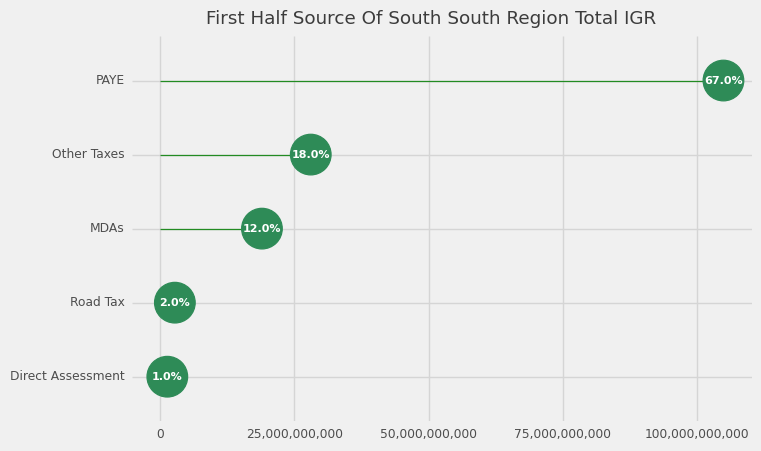

<ggplot: (16614081)>

In [19]:
fn.zone_source(half_year, "South South", "half year")

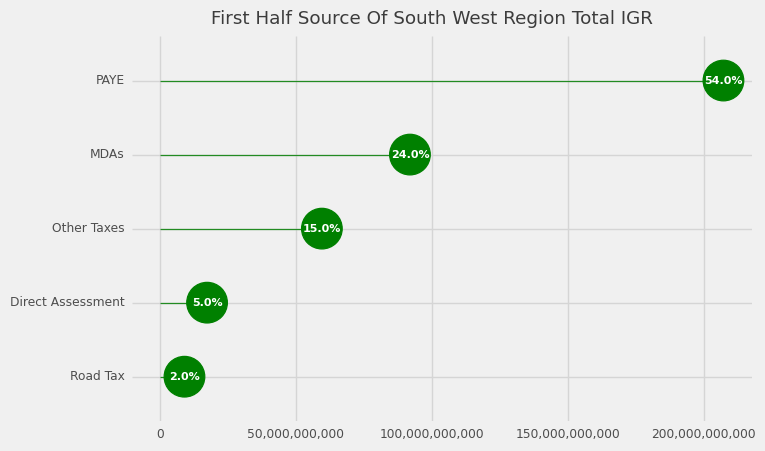

<ggplot: (16582533)>

In [20]:
fn.zone_source(half_year, "South West", "half year")

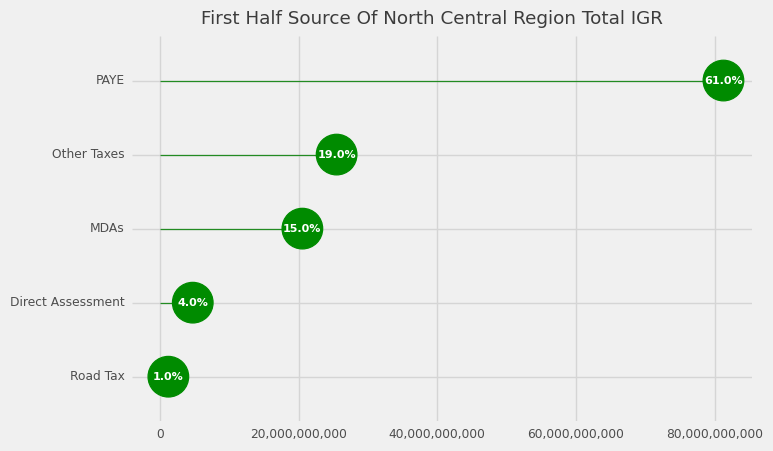

<ggplot: (18322981)>

In [21]:
fn.zone_source(half_year, "North Central", "half year")

Focusing on The South South, South West and North Central region and the first half of 2021, The highest Source of IGR was PAYE while South West generated more revenue throught MDAs than the South south and North central which generated more revenue through Other Taxes.  
Road tax had the lowest contribution to the IGR for South West and North Central while South South had Direct assessment as the lowest contributor to it IGR.

#### Some other IGR by Geo-political Zone

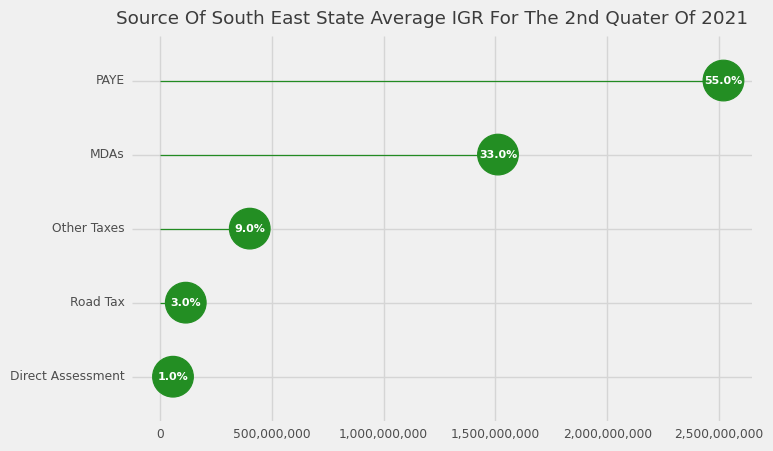

<ggplot: (18307355)>

In [22]:
fn.zone_source(q2, "South East", "q2", "median")

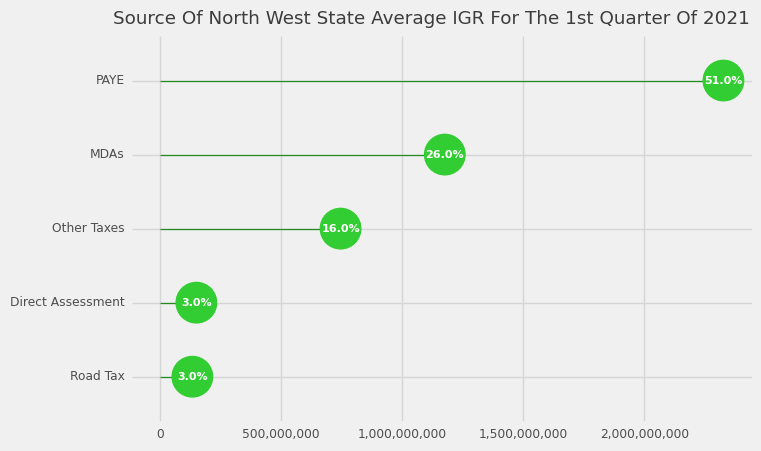

<ggplot: (18276605)>

In [23]:
fn.zone_source(q1, "North West", "q1", "mean")

<a name="soigrbs"><a/>
## Sources Of Internally Generated Revenue by State

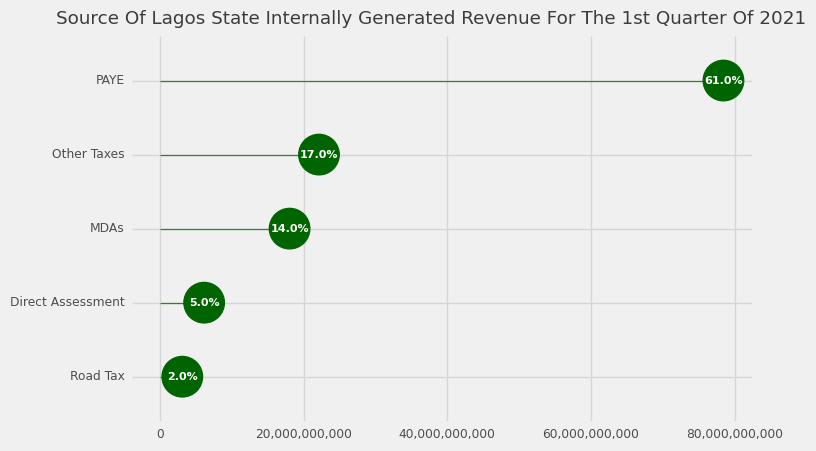

<ggplot: (18518485)>

In [24]:
fn.state_source(q1, "Lagos", "q1")

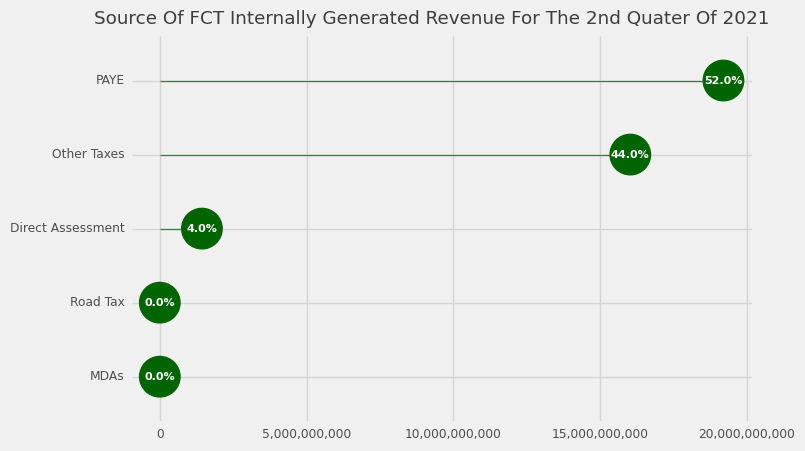

<ggplot: (18544071)>

In [25]:
fn.state_source(q2, "FCT", "q2")

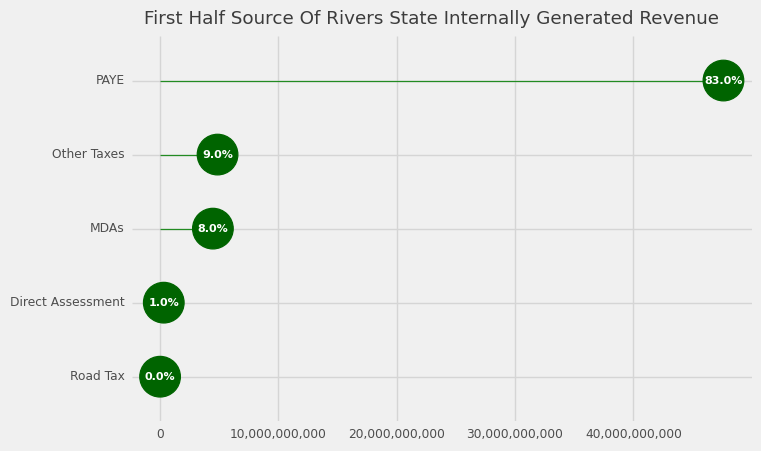

<ggplot: (18513227)>

In [26]:
fn.state_source(half_year, "Rivers", "half year")

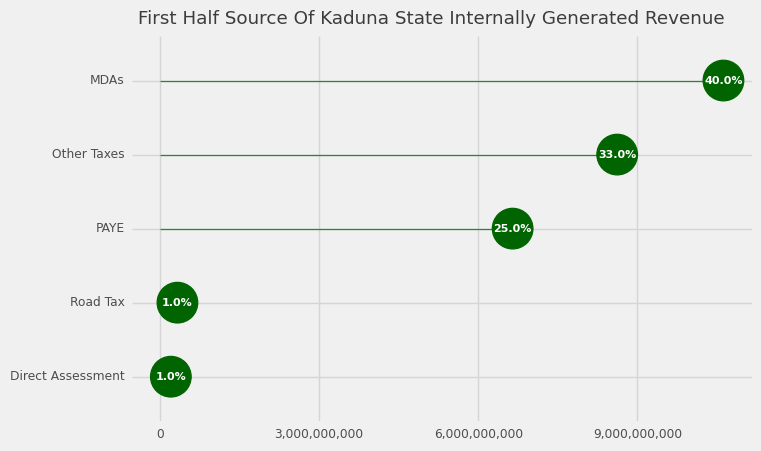

<ggplot: (18568793)>

In [27]:
fn.state_source(half_year, "Kaduna", "half year")

PAYE and Other Taxes are the highest contributors to the IGR for states such as Lagos, Rivers, Kaduna and abuja (FCT) while Road Tax had the lowest contribution for the mentioned state except for Kaduna state and FCT.

<a name="tigtfswagz"><a/>
## Total Internally Generate Revenue For States within a Geo-Political Zone

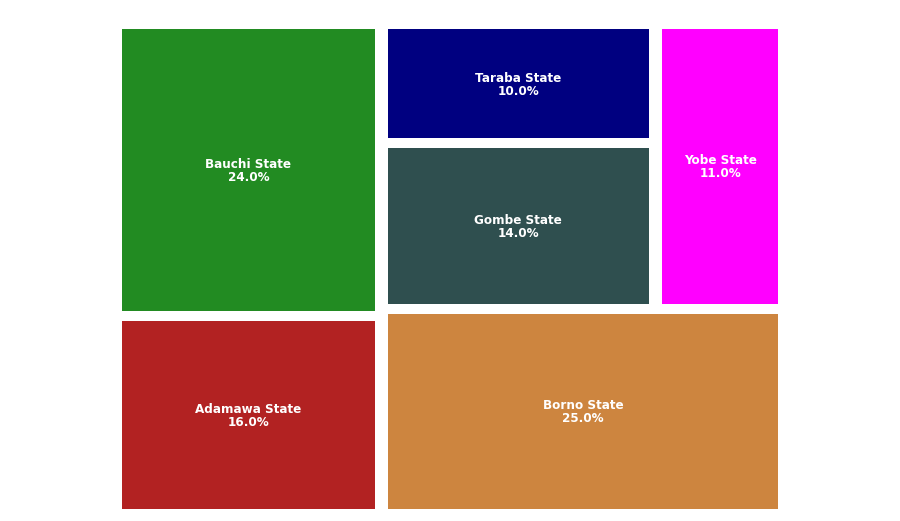

In [28]:
fn.region_total_revenue(q1, "North East", "Grand Total", "q1")

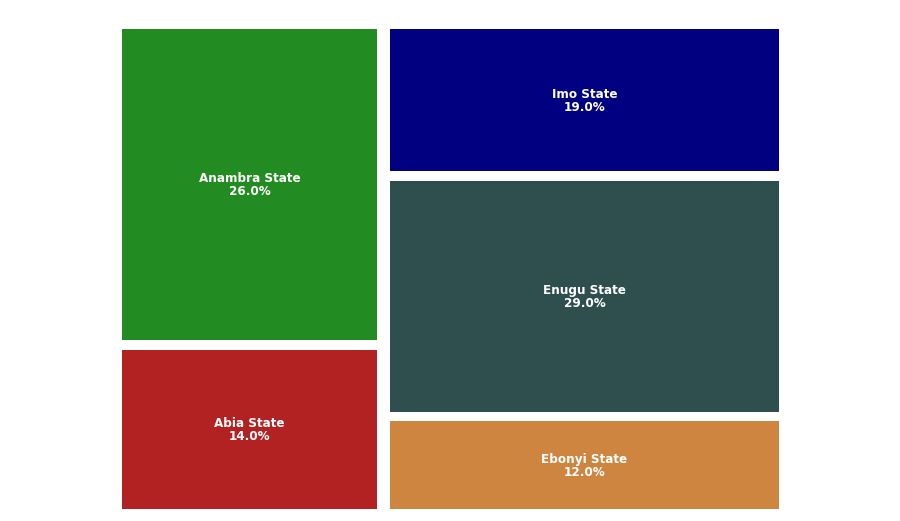

In [29]:
fn.region_total_revenue(q2, "South East", "Grand Total", "q2")

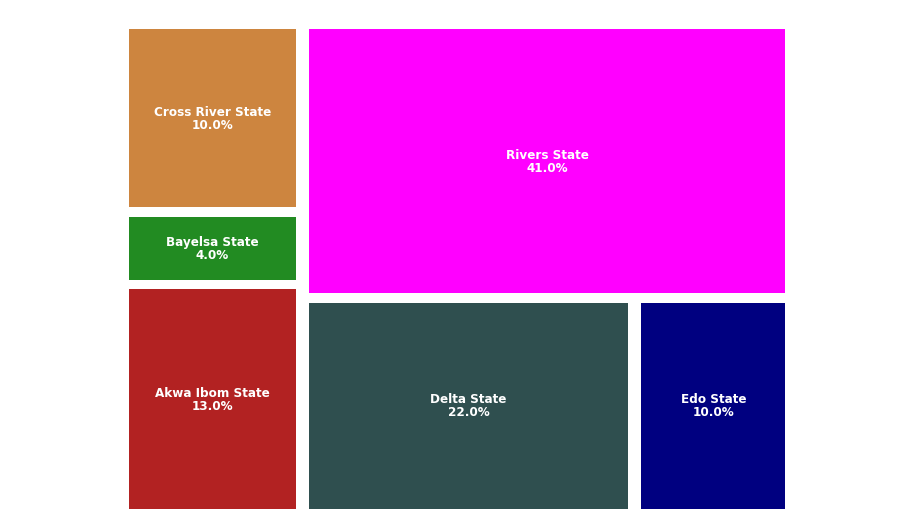

In [30]:
fn.region_total_revenue(q1, "South South", "Grand Total", "q1")

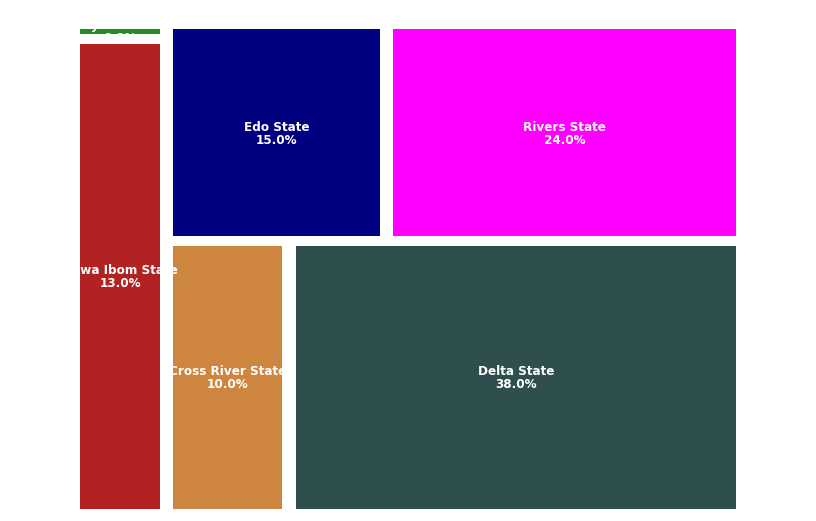

In [31]:
fn.region_total_revenue(half_year, "South South", "MDAs", "half year")

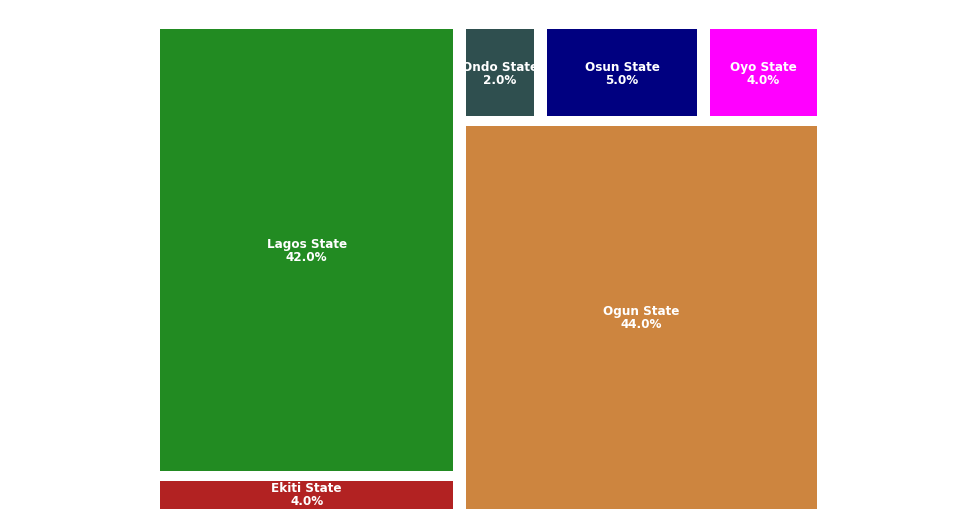

In [32]:
fn.region_total_revenue(q2, "South West", ["Road Tax", "MDAs"],"q2")

<a name="piodir"><a/>
## Percentage Increase Or Decrease In Revenue

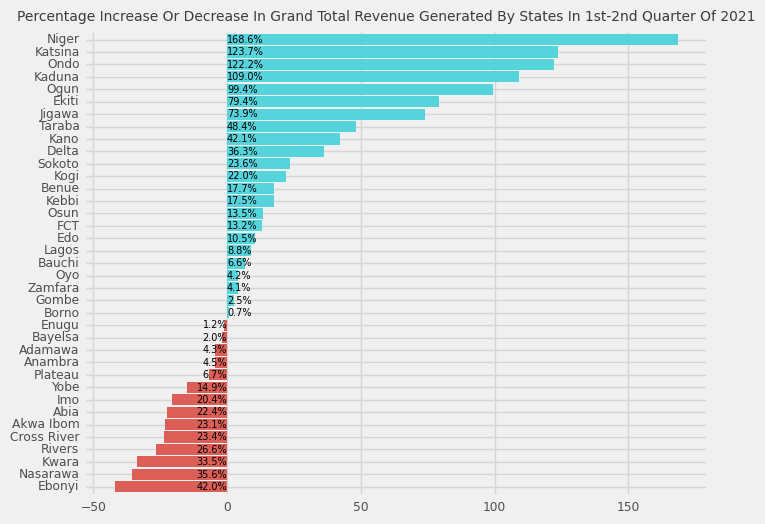

<ggplot: (17908565)>

In [33]:
fn.revenue_change(q1, q2, "Grand Total")

The above figure shows the percentage increase and decrease in th total IGR for all 36 states including FCT, it shows majority of the states had an increase in IGR for the 2nd quarter of 2021 from the 1st quarter.   
Niger state lead the way with 168.6% increase which is followed by Kastina and Ondo state while the highest drop in IGR was Ebonyi State with a 42.0% decrease in IGR.

#### Other Revenue are as follow

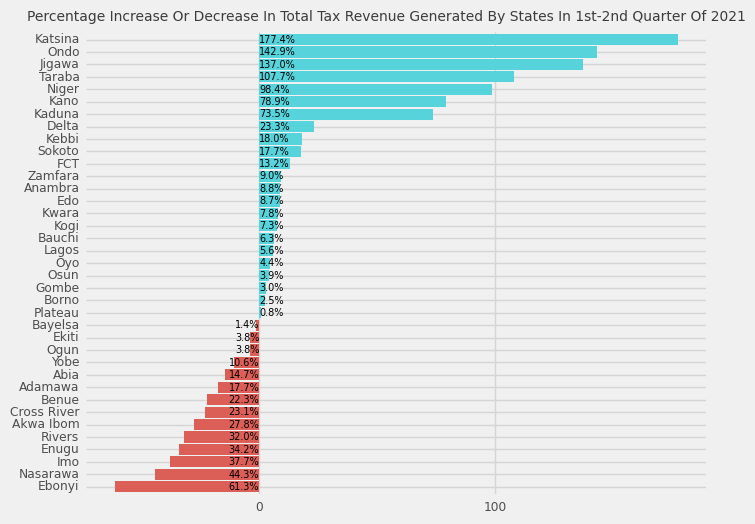

<ggplot: (18205137)>

In [34]:
fn.revenue_change(q1, q2, "Total Tax")

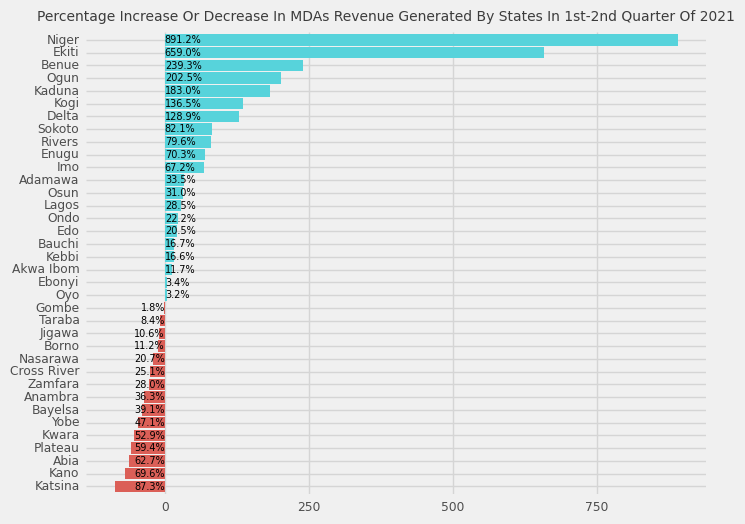

<ggplot: (17138997)>

In [35]:
fn.revenue_change(q1, q2, "MDAs")

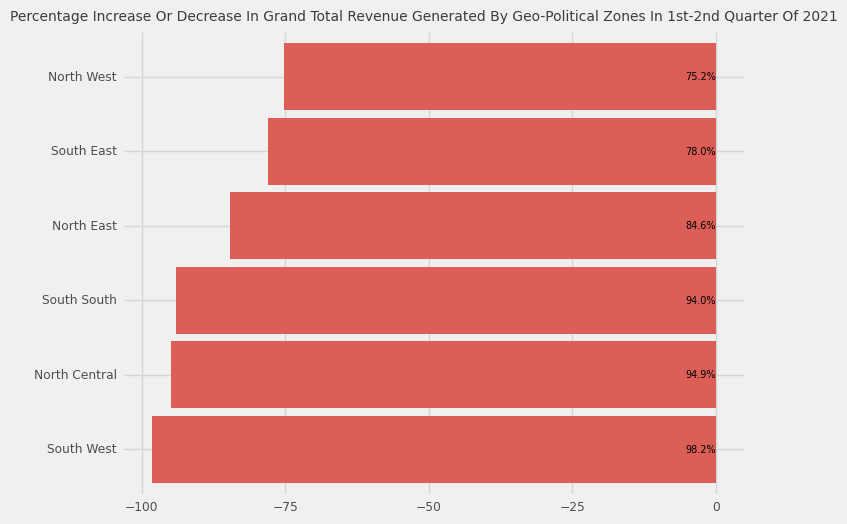

<ggplot: (17381593)>

In [36]:
fn.revenue_change(q1, q2, "Grand Total", by = "Zone")

All geo-political Zone had a decrease in IGR from the 1st Quarter to the 2nd Quarter of 2021.

<a name="soargfas"><a/>
## Summary of All Revenue Generated From All state

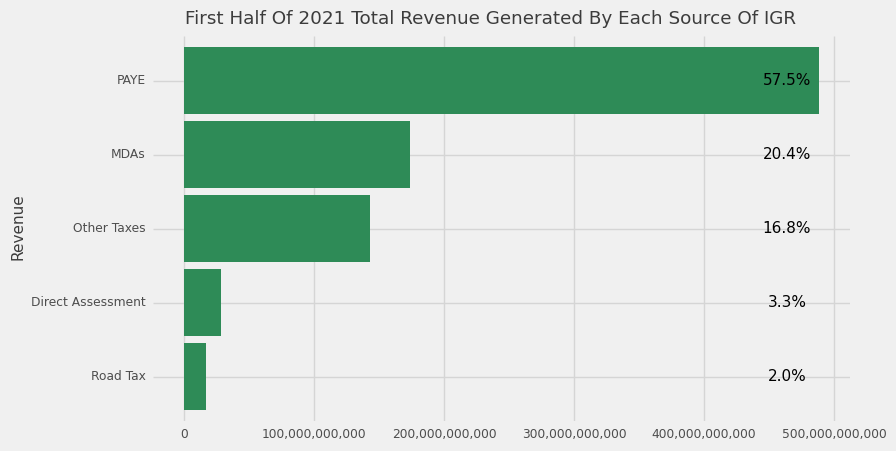

<ggplot: (17096839)>

In [37]:
fn.revenue_summary(half_year, "half year")

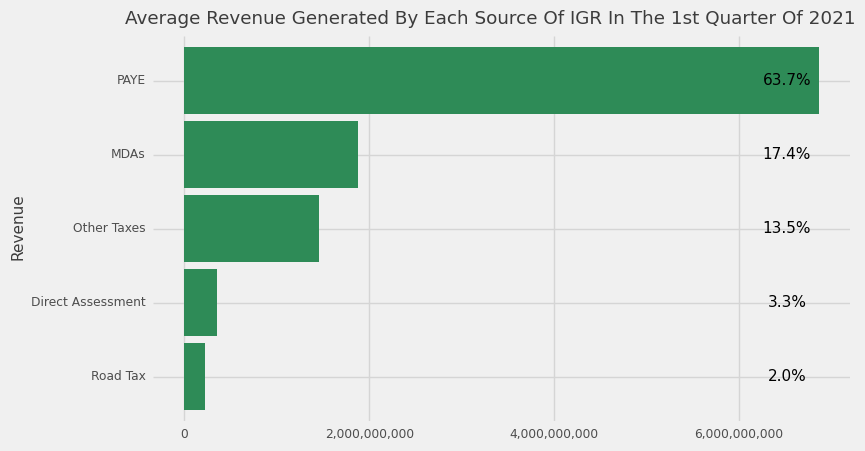

<ggplot: (17305343)>

In [38]:
fn.revenue_summary(q1, "q1", "mean")

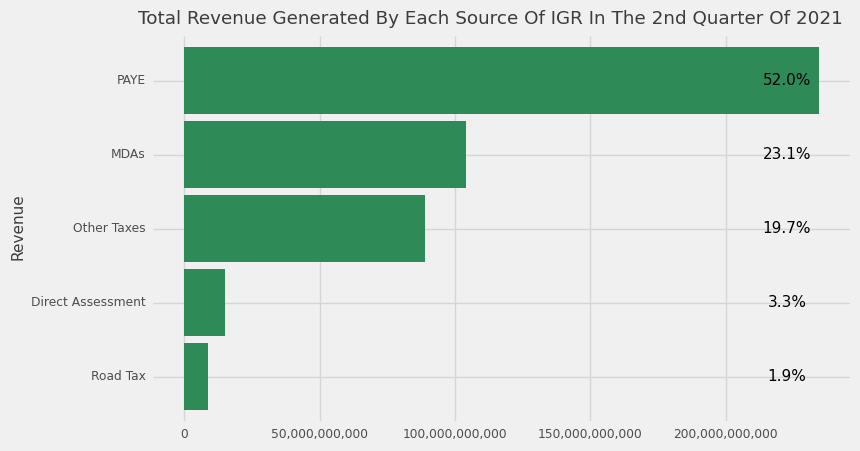

<ggplot: (728219)>

In [39]:
fn.revenue_summary(q2, "q2")

The Highest source of IGR can from PAYE (52.0%) while Road Tax had the lowest contribution to the IGR (1.9%) for all states in the federation.